# Numerical solution of uSEIR

- This notebook illustrates the numerical solutions of uSEIR equations
- A benchmark version in python is compared with a full version in cython.
- A factor 100 in speed is found.
- Functions are imported from python/cython files
- JJGC, May, year of the plague. 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())
import numpy as np
import pandas as pd
import matplotlib

Last updated on  Tue Jun  2 13:14:06 2020


In [2]:
fontsize=20
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': fontsize,
        }

plt.rcParams["font.size"     ] = fontsize


In [3]:
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import poisson

In [4]:
from useir.useir   import csolve_uSeir
from useir.useir   import csolve_uSeir_quenched

In [5]:
from useir.analysis import plot_useir

In [6]:
from useir.pyuseir import solve_uSeir


# The python version: very slow

In [44]:
t1 = time.time()
df = solve_uSeir(ti_shape     = 5.5,  
                   ti_scale     = 1, 
                   tr_shape     = 6.5,  
                   tr_scale     = 1,
                   R0           = 3.5)
t2 = time.time()
print(f'python solve_seir call: dr = {t2-t1}')

 Function solve_uSeir: time epsilon = 0.01
 statistical distribution is Gamma , ti = 5.5, tr = 6.5
 number of exposed compartments = 1868, infected compartments = 2043
 R0 = 3.5, prob = 0.5384615384615384, pn = 0.005384615384615384
python solve_seir call: dr = 56.97675371170044


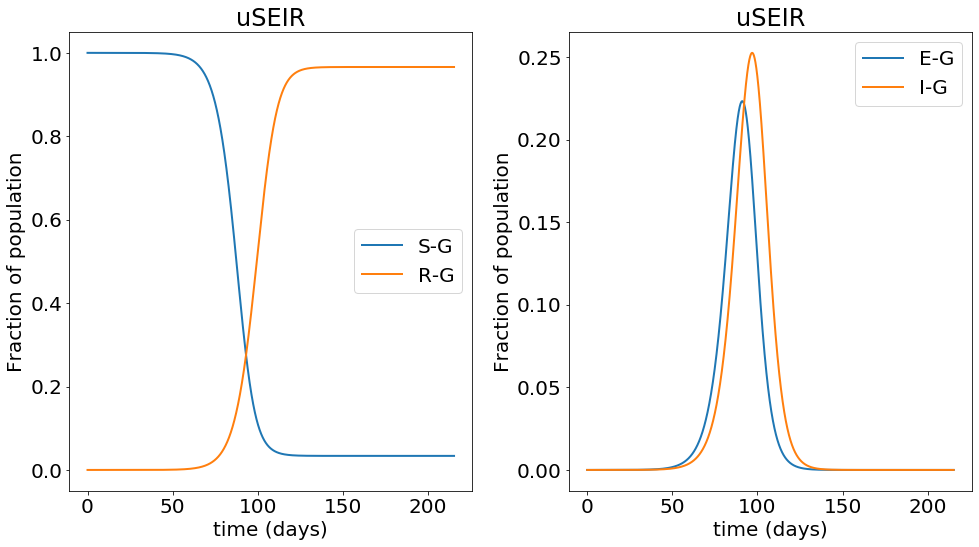

In [45]:
plot_useir((df,), ('G',), T = 'uSEIR', figsize=(14,8))

# Cython version

## Solve for Poisson

In [20]:
t1 = time.time()
pdf = csolve_uSeir(dist = 'poisson', 
                         ti_shape = 5.5,  
                         tr_shape = 2.5, 
                         R0 = 3.5,
                         Smin         = 1e-12,
                         Emin         = 1e-12,
                         nmax         = 5000
                  )
                  
t2 = time.time()
print(f'cython solve_seir call: dr = {t2-t1}')

 Function compute_pde with sampling = Fine, time epsilon = 0.01
 statistical distribution = poisson, ti = 5.5, tr = 5.5
 number of exposed compartments = 1600, infected compartments = 1000
len pdE = 1600, max(pdE) =0.17140068409793713 len pdi = 1000 max(pdI) =0.2565156206996839
prob = 0.6363636363636364, pn = 0.006363636363636364
cython solve_seir call: dr = 0.5149109363555908


## Solve for Gamma

In [21]:
t1 = time.time()
gdf = csolve_uSeir(dist = 'gamma', 
                              ti_shape = 5.5,
                              ti_scale = 1,
                              tr_shape = 2.5, 
                              tr_scale = 1,
                              R0 = 3.5,
                              Smin         = 1e-12,
                              Emin         = 1e-12,
                              nmax         = 5000
                  )
t2 = time.time()
print(f'cython solve_seir call: dr = {t2-t1}')

 Function compute_pde with sampling = Fine, time epsilon = 0.01
 statistical distribution = gamma, ti = 6.5, tr = 3.5
 number of exposed compartments = 1868, infected compartments = 1287
len pdE = 1868, max(pdE) =0.0018461745940739904 len pdi = 1287 max(pdI) =0.0018461745940739904
prob = 1.0, pn = 0.01
cython solve_seir call: dr = 0.5379459857940674


## Solve for exponential

In [22]:
t1 = time.time()
edf = csolve_uSeir(dist = 'expon', 
                         ti_scale = 5.5,  
                         tr_scale = 2.5, 
                         pde_sampling = 'Fine',
                         R0 = 3.5,
                         Smin         = 1e-12,
                         Emin         = 1e-12,
                         nmax         = 5000
                  )
t2 = time.time()
print(f'cython solve_seir call: dr = {t2-t1}')

 Function compute_pde with sampling = Fine, time epsilon = 0.01
 statistical distribution = expon, ti = 5.5, tr = 2.5
 number of exposed compartments = 5065, infected compartments = 2302
len pdE = 5065, max(pdE) =0.0018165299269177258 len pdi = 2302 max(pdI) =0.003992010656008528
prob = 1.4, pn = 0.013999999999999999
cython solve_seir call: dr = 0.937734842300415


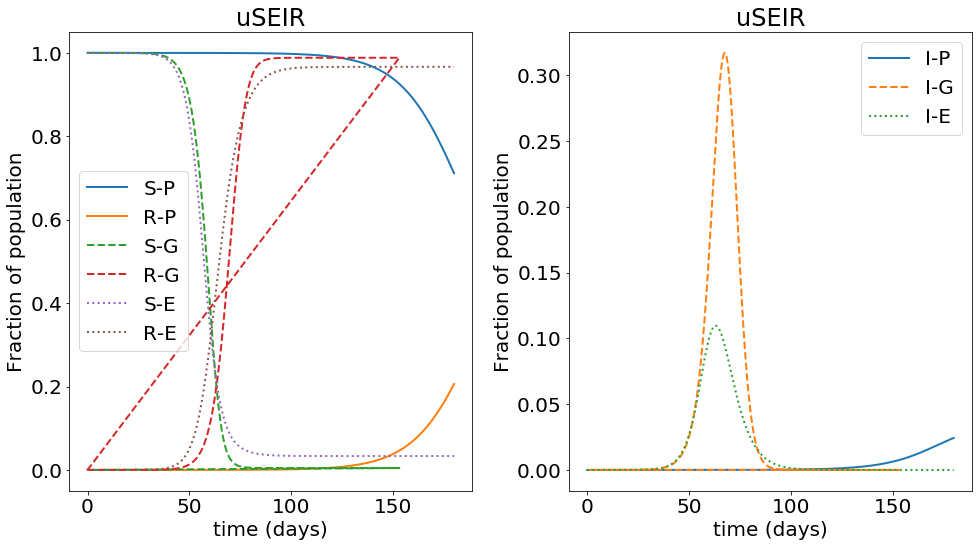

In [23]:
plot_useir((pdf,gdf,edf), ('P','G','E'), ('solid','dashed','dotted'),T = 'uSEIR', figsize=(14,8))

# Seir (expo) versus uSeir (gamma) unquenched

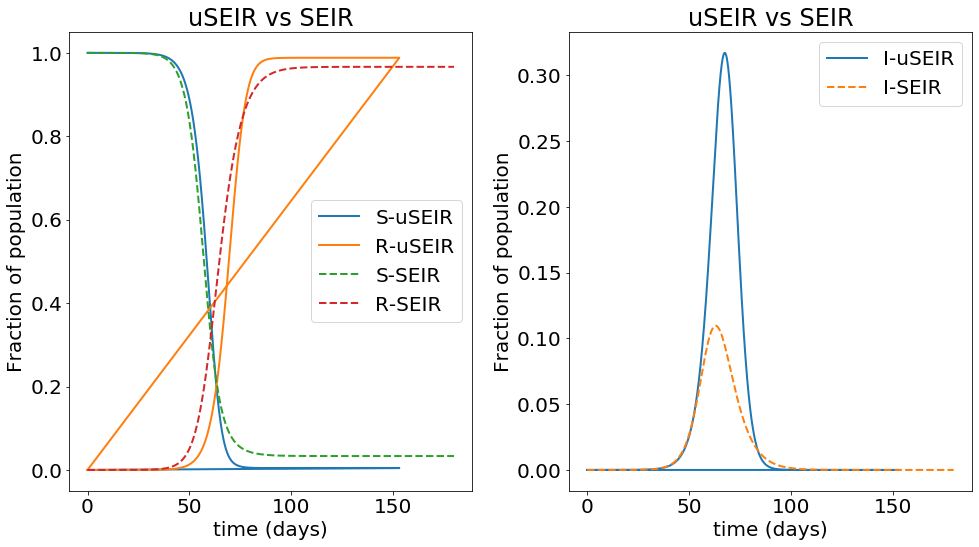

In [24]:
plot_useir((gdf,edf), ('uSEIR','SEIR'), ('solid','dashed'), T = 'uSEIR vs SEIR', figsize=(14,8))

# Quenched

## Gamma (uSeir)

In [17]:
t1 = time.time()
gqdf = csolve_uSeir_quenched (dist = 'gamma', 
                              ti_shape = 5.5,
                              ti_scale = 1,
                              tr_shape = 6.5, 
                              tr_scale = 1,
                              R0 = 3.5,
                              R1 = 2.9, 
                              tq = 50)
t2 = time.time()
print(f'cython solve_seir_quenched call: dr = {t2-t1}')

 Function compute_pde with sampling = Fine, time epsilon = 0.01
 statistical distribution = gamma, ti = 6.5, tr = 7.5
 number of exposed compartments = 1868, infected compartments = 2043
len pdE = 1868, max(pdE) =0.0018461745940739904 len pdi = 2043 max(pdI) =0.0018461745940739904
prob (R0 = 3.5)= 0.4666666666666667, pn = 0.004666666666666667
cython solve_seir_quenched call: dr = 0.6585311889648438


## Expo (Seir) 

In [18]:
t1 = time.time()
eqdf = csolve_uSeir_quenched (dist = 'expon', 
                              ti_shape = 5.5,
                              ti_scale = 1,
                              tr_shape = 6.5, 
                              tr_scale = 1,
                              R0 = 3.5,
                              R1 = 2.5, 
                              tq = 50)
t2 = time.time()
print(f'cython solve_seir_quenched call: dr = {t2-t1}')

 Function compute_pde with sampling = Fine, time epsilon = 0.01
 statistical distribution = expon, ti = 1.0, tr = 1.0
 number of exposed compartments = 921, infected compartments = 921
len pdE = 921, max(pdE) =0.009950166250831945 len pdi = 921 max(pdI) =0.009950166250831945
prob (R0 = 3.5)= 3.5, pn = 0.035
cython solve_seir_quenched call: dr = 0.21961402893066406


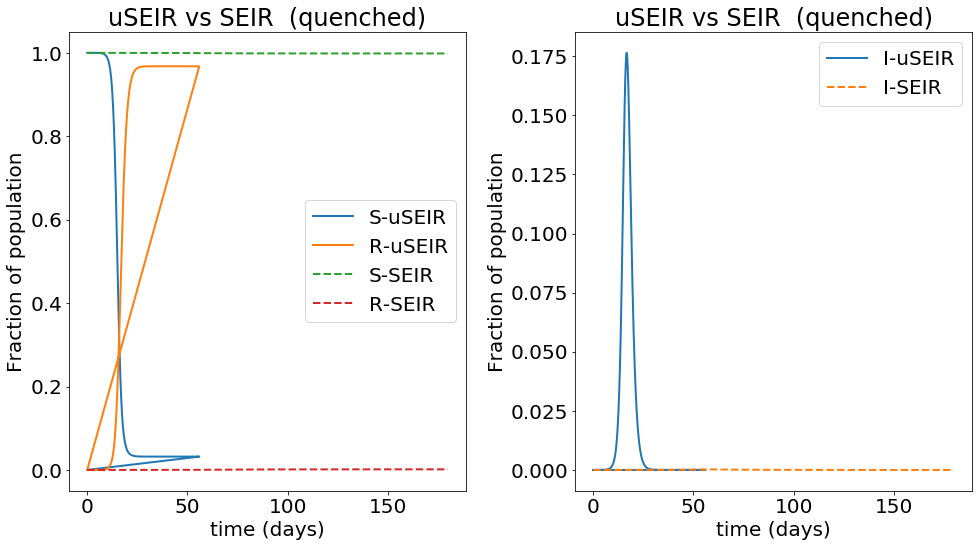

In [16]:
plot_useir((eqdf,gqdf), ('uSEIR','SEIR'), ('solid','dashed'), T = 'uSEIR vs SEIR  (quenched)', figsize=(14,8))